In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 

import math
from tensorflow.keras.utils import to_categorical

In [2]:
(X_dev, y_dev), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_dev,y_dev, test_size=0.2)

In [4]:
np.asarray(tf.image.resize(np.expand_dims(X_dev[2],-1), [10,10])[:,:,0]).astype(int)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  65,   0,   0,   0,   0,   0, 165,   0,   0],
       [  0, 164,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0, 225,   0,   0,   0,   1, 125, 108,   0,   0],
       [  0, 222, 186, 232, 226, 110, 170,   2,   0,   0],
       [  0,   0,   0,   0,   0,   0, 228,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 228,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 222,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

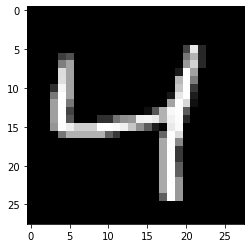

In [5]:
plt.imshow(X_dev[2], cmap="gray")
plt.savefig("mnist_4.png")

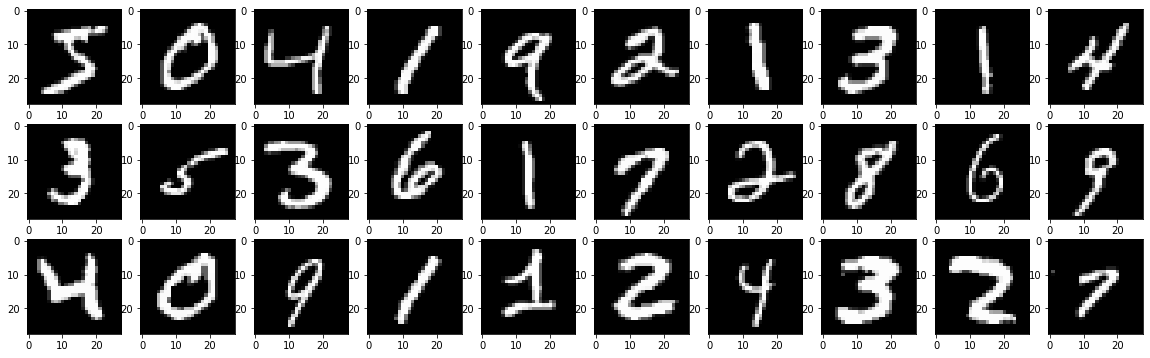

In [6]:
plt.figure(figsize=(20,6))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_dev[i], cmap="gray")
plt.savefig("mnist_multiple.png",dpi=100)

In [7]:
X_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(np.expand_dims(X_train,-1)))
X_val = tf.image.grayscale_to_rgb(tf.convert_to_tensor(np.expand_dims(X_val,-1)))
X_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(np.expand_dims(X_test,-1)))

In [8]:
X_train = tf.image.resize(X_train, [32,32])
X_val = tf.image.resize(X_val, [32,32])
X_test = tf.image.resize(X_test, [32,32])

In [9]:
X_test.shape

TensorShape([10000, 32, 32, 3])

#### LeNet:

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6, 5, activation='tanh', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Conv2D(16, 5, activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

C:\Users\Bjorn\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6, 5, activation='relu', input_shape=(X_train.shape[1:])))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(16, 5, activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(120, 5, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC(curve='ROC')])

In [14]:
history = model.fit(x=X_train,y=y_train, epochs=15, batch_size=64, validation_data=(X_val,y_val), shuffle=True
                   )

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - auc: 0.9373 - categorical_accuracy: 0.8936 - loss: 0.4447 - val_auc: 0.9727 - val_categorical_accuracy: 0.9793 - val_loss: 0.0637
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc: 0.9741 - categorical_accuracy: 0.9811 - loss: 0.0631 - val_auc: 0.9809 - val_categorical_accuracy: 0.9812 - val_loss: 0.0632
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - auc: 0.9758 - categorical_accuracy: 0.9849 - loss: 0.0460 - val_auc: 0.9839 - val_categorical_accuracy: 0.9843 - val_loss: 0.0521
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc: 0.9813 - categorical_accuracy: 0.9885 - loss: 0.0358 - val_auc: 0.9888 - val_categorical_accuracy: 0.9847 - val_loss: 0.0471
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - auc: 0.9797 - categorical_accuracy: 0.9905 - loss: 0.0301 - val_auc: 0.9809 - val_categorical_accuracy: 0.9838 - val_loss: 0.0536
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - auc: 0.9735 - categorical_

In [16]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.9573 - categorical_accuracy: 0.9832 - loss: 0.0601


[0.05153267830610275, 0.9861000180244446, 0.9584185481071472]

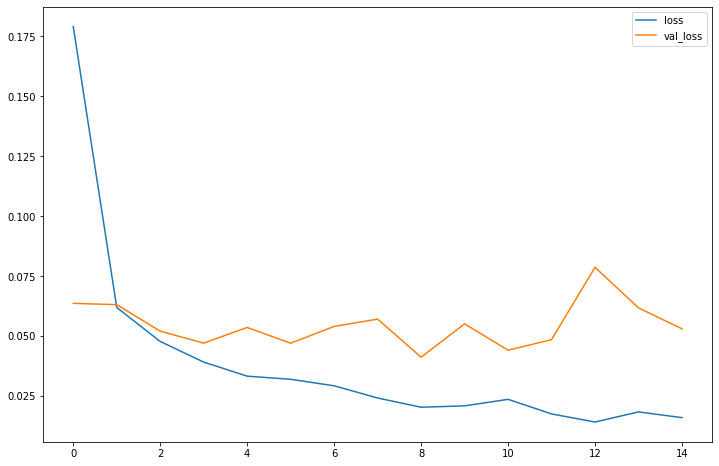

In [17]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

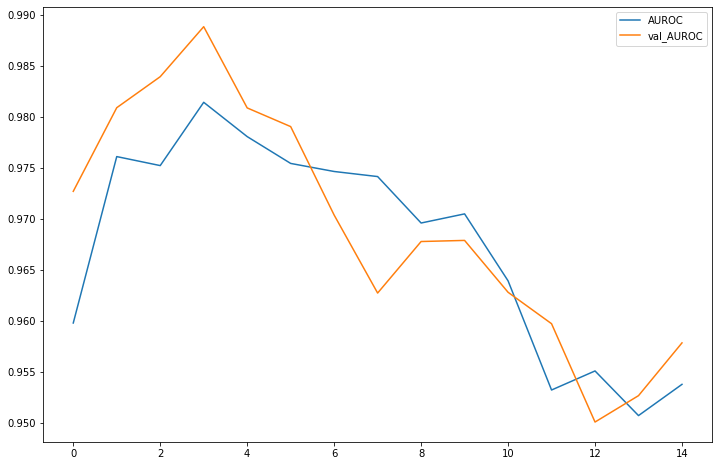

In [15]:
plt.figure(figsize=(12,8))
plt.plot(history.history["auc"], label="AUROC")
plt.plot(history.history["val_auc"], label="val_AUROC")
plt.legend()